# Algothon 2019

In [1]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [156]:
start_date = '2016-07'
ric = 'NFLX'

## Social media features
### Facebook

In [158]:
# fbp_df = quandl.get_table('SMA/FBP', brand_ticker=ric, paginate=True)
fbp_df = pd.read_pickle('data/{}_fbp.pickle'.format(ric))

In [159]:
fbp_df.head()

,brand_ticker,page_id,post_id,sector,geography,type,created_time,total-reactions,reactions-like,reactions_love,...,reactions-wow,reactions-sad,reactions-angry,comments,shares,reach,impressions,engagement_score,sentiment,date
None,,,,,,,,,,,,,,,,,,,,,
0,NFLX,1381060095493090,1381060095493090_1943885005877260,Entertainment,Germany,VIDEO,2017-07-18 12:30:00 +0000,1565,1425,130,...,7,1,1,378,37,232461,385721,508,POSITIVE,2017-07-18
1,NFLX,1381060095493090,1381060095493090_1943116792620748,Entertainment,Germany,VIDEO,2017-07-17 09:00:00 +0000,9923,9156,519,...,234,0,3,5317,270,1643391,2726871,999,POSITIVE,2017-07-17
2,NFLX,1381060095493090,1381060095493090_1941702816095479,Entertainment,Germany,VIDEO,2017-07-16 12:00:00 +0000,4680,3849,40,...,6,0,0,2005,260,918466,1524006,958,POSITIVE,2017-07-16
3,NFLX,1381060095493090,1381060095493090_1940184396247321,Entertainment,Germany,VIDEO,2017-07-16 09:00:00 +0000,1138,1097,27,...,12,1,0,472,22,290246,481604,508,POSITIVE,2017-07-16
4,NFLX,1381060095493090,1381060095493090_1940173799581714,Entertainment,Germany,STATUS,2017-07-15 04:00:00 +0000,5808,4891,79,...,1,1,1,922,131,214264,355527,876,POSITIVE,2017-07-15


In [160]:
fbp_df = fbp_df.set_index('post_id', drop=True)

fbp_df.head()

,brand_ticker,page_id,sector,geography,type,created_time,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,reach,impressions,engagement_score,sentiment,date
post_id,,,,,,,,,,,,,,,,,,,,
1381060095493090_1943885005877260,NFLX,1381060095493090,Entertainment,Germany,VIDEO,2017-07-18 12:30:00 +0000,1565,1425,130,1,7,1,1,378,37,232461,385721,508,POSITIVE,2017-07-18
1381060095493090_1943116792620748,NFLX,1381060095493090,Entertainment,Germany,VIDEO,2017-07-17 09:00:00 +0000,9923,9156,519,11,234,0,3,5317,270,1643391,2726871,999,POSITIVE,2017-07-17
1381060095493090_1941702816095479,NFLX,1381060095493090,Entertainment,Germany,VIDEO,2017-07-16 12:00:00 +0000,4680,3849,40,785,6,0,0,2005,260,918466,1524006,958,POSITIVE,2017-07-16
1381060095493090_1940184396247321,NFLX,1381060095493090,Entertainment,Germany,VIDEO,2017-07-16 09:00:00 +0000,1138,1097,27,1,12,1,0,472,22,290246,481604,508,POSITIVE,2017-07-16
1381060095493090_1940173799581714,NFLX,1381060095493090,Entertainment,Germany,STATUS,2017-07-15 04:00:00 +0000,5808,4891,79,835,1,1,1,922,131,214264,355527,876,POSITIVE,2017-07-15


In [161]:
count_data_cols = ['total-reactions', 'reactions-like', 'reactions_love', 'reactions-haha', 'reactions-wow',
                   'reactions-sad', 'reactions-angry', 'comments', 'shares', 'sentiment', 'date']

post_count_data = fbp_df.loc[:, count_data_cols]

post_count_data.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,sentiment,date
post_id,,,,,,,,,,,
1381060095493090_1943885005877260,1565,1425,130,1,7,1,1,378,37,POSITIVE,2017-07-18
1381060095493090_1943116792620748,9923,9156,519,11,234,0,3,5317,270,POSITIVE,2017-07-17
1381060095493090_1941702816095479,4680,3849,40,785,6,0,0,2005,260,POSITIVE,2017-07-16
1381060095493090_1940184396247321,1138,1097,27,1,12,1,0,472,22,POSITIVE,2017-07-16
1381060095493090_1940173799581714,5808,4891,79,835,1,1,1,922,131,POSITIVE,2017-07-15


One-hot encode the sentiment column:

In [162]:
from sklearn.preprocessing import OneHotEncoder

sentiment_oh_enc = OneHotEncoder()
sentiment = post_count_data['sentiment'].values.reshape(-1, 1)
sentiment_oh_enc.fit(sentiment)

sentiment_oh = sentiment_oh_enc.transform(sentiment).toarray()

sentiment_oh = pd.DataFrame(sentiment_oh, index=post_count_data.index)

post_count_data = post_count_data.join(sentiment_oh)

In [163]:
post_count_data.drop('sentiment', axis=1, inplace=True)
post_count_data.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,date,0,1,2,3
post_id,,,,,,,,,,,,,,
1381060095493090_1943885005877260,1565,1425,130,1,7,1,1,378,37,2017-07-18,0.0,0.0,1.0,0.0
1381060095493090_1943116792620748,9923,9156,519,11,234,0,3,5317,270,2017-07-17,0.0,0.0,1.0,0.0
1381060095493090_1941702816095479,4680,3849,40,785,6,0,0,2005,260,2017-07-16,0.0,0.0,1.0,0.0
1381060095493090_1940184396247321,1138,1097,27,1,12,1,0,472,22,2017-07-16,0.0,0.0,1.0,0.0
1381060095493090_1940173799581714,5808,4891,79,835,1,1,1,922,131,2017-07-15,0.0,0.0,1.0,0.0


In [164]:
post_count_data.rename({0: 'sentiment1', 1: 'sentiment2', 2: 'sentiment3', 3: 'sentiment4'}, axis=1, inplace=True)
post_count_data.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,date,sentiment1,sentiment2,sentiment3,sentiment4
post_id,,,,,,,,,,,,,,
1381060095493090_1943885005877260,1565,1425,130,1,7,1,1,378,37,2017-07-18,0.0,0.0,1.0,0.0
1381060095493090_1943116792620748,9923,9156,519,11,234,0,3,5317,270,2017-07-17,0.0,0.0,1.0,0.0
1381060095493090_1941702816095479,4680,3849,40,785,6,0,0,2005,260,2017-07-16,0.0,0.0,1.0,0.0
1381060095493090_1940184396247321,1138,1097,27,1,12,1,0,472,22,2017-07-16,0.0,0.0,1.0,0.0
1381060095493090_1940173799581714,5808,4891,79,835,1,1,1,922,131,2017-07-15,0.0,0.0,1.0,0.0


In [165]:
post_count_daysum = post_count_data.groupby('date').sum()

post_count_daysum.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,sentiment1,sentiment2,sentiment3,sentiment4
date,,,,,,,,,,,,,
2014-01-01,9849,9849,0,0,0,0,0,2161,943,9.0,4.0,4.0,2.0
2014-01-02,4943,4943,0,0,0,0,0,1508,321,9.0,2.0,8.0,0.0
2014-01-03,5453,5453,0,0,0,0,0,1264,481,8.0,2.0,9.0,7.0
2014-01-04,838,838,0,0,0,0,0,172,162,4.0,0.0,2.0,6.0
2014-01-05,716,716,0,0,0,0,0,236,64,2.0,0.0,2.0,4.0


Aggregating data - weighted sum:

In [166]:
def weights_n_days(n, alpha=3):
    return 1 - np.exp(-alpha * np.linspace(0, 1, n))

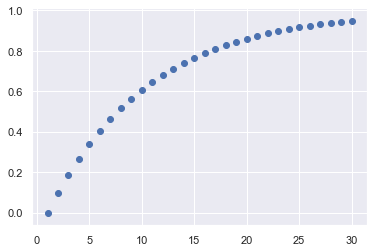

In [167]:
plt.scatter(range(1, 31), weights_n_days(30))

In [168]:
reactions = ['reactions-like', 'reactions_love', 'reactions-haha', 'reactions-wow', 'reactions-sad', 'reactions-angry']

# tmp = post_count_daysum.loc[:, reactions_and_total]
rolling_sum_30d = post_count_daysum.rolling(window=30).apply(lambda s: np.sum(s * weights_n_days(30)))
rolling_sum_10d = post_count_daysum.rolling(window=10).apply(lambda s: np.sum(s * weights_n_days(10)))

rolling_sum_30d.loc[:, reactions] = rolling_sum_30d.loc[:, reactions].div(rolling_sum_30d.loc[:, 'total-reactions'], axis=0)
rolling_sum_10d.loc[:, reactions] = rolling_sum_10d.loc[:, reactions].div(rolling_sum_10d.loc[:, 'total-reactions'], axis=0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


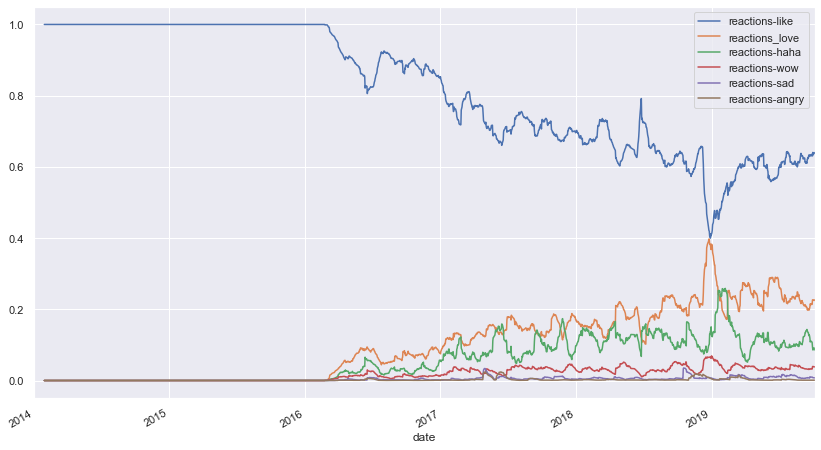

In [169]:
rolling_sum_30d.loc[:, reactions].plot(figsize=(14, 8))

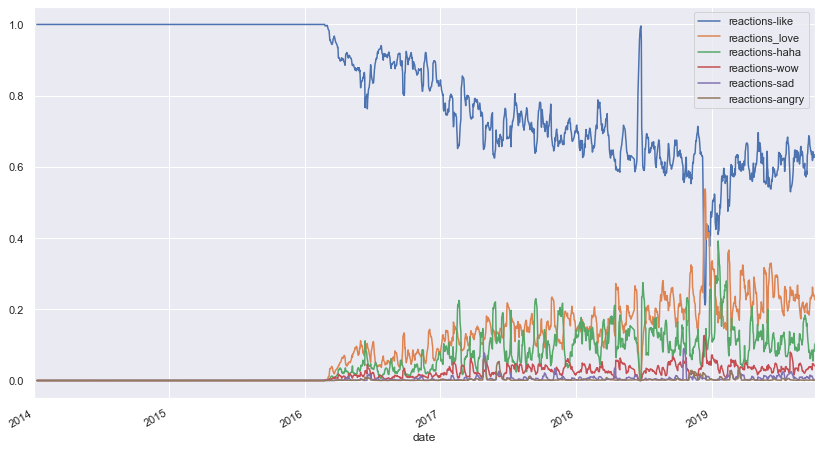

In [170]:
rolling_sum_10d.loc[:, reactions].plot(figsize=(14, 8))

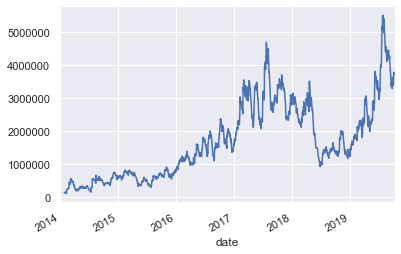

In [171]:
rolling_sum_30d['total-reactions'].plot()

In [172]:
def min_max_standardise(s):
    return (s - s.min()) / (s.max() - s.min())

In [173]:
to_normalise_names = ['total-reactions', 'comments', 'shares']

to_normalise_30d = rolling_sum_30d.loc[:, to_normalise_names]
to_normalise_30d = (to_normalise_30d / to_normalise_30d.rolling(window=200).std()).loc[start_date:]
to_normalise_30d = min_max_standardise(to_normalise_30d)
rolling_sum_30d.loc[:, to_normalise_names] = to_normalise_30d

to_normalise_10d = rolling_sum_10d.loc[:, to_normalise_names]
to_normalise_10d = (to_normalise_10d / to_normalise_10d.rolling(window=200).std()).loc[start_date:]
to_normalise_10d = min_max_standardise(to_normalise_10d)
rolling_sum_10d.loc[:, to_normalise_names] = to_normalise_10d

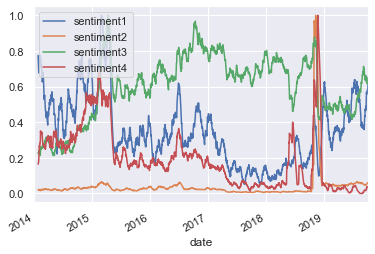

In [175]:
sentiment_col_names = ['sentiment' + str(i) for i in range(1, 5)]

sentiment_cols_30d = rolling_sum_30d.loc[:, sentiment_col_names]
sentiment_cols_30d = sentiment_cols_30d / sentiment_cols_30d.max()

sentiment_cols_10d = rolling_sum_10d.loc[:, sentiment_col_names]
sentiment_cols_10d = sentiment_cols_10d / sentiment_cols_10d.max()

sentiment_cols_30d.plot()

Combine facebook features:

In [176]:
fb_features = pd.concat([
    rolling_sum_30d.drop(sentiment_col_names, axis=1),
    rolling_sum_10d.drop(sentiment_col_names, axis=1),
    sentiment_cols_30d,
    sentiment_cols_10d
], axis=1).loc[start_date:]

fb_features.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,total-reactions,...,comments,shares,sentiment1,sentiment2,sentiment3,sentiment4,sentiment1,sentiment2,sentiment3,sentiment4
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.638925,0.824088,0.086299,0.050575,0.026342,0.007776,0.004920,0.448576,0.338185,0.479529,...,0.244247,0.142862,0.614885,0.054898,0.820209,0.364420,0.496909,0.024446,0.692579,0.183196
2016-07-02,0.620437,0.824470,0.087213,0.049365,0.026302,0.007779,0.004871,0.434055,0.342682,0.461222,...,0.238854,0.161546,0.608353,0.059340,0.811747,0.358294,0.464240,0.029138,0.666556,0.167363
2016-07-03,0.604876,0.823977,0.089145,0.047814,0.026504,0.007785,0.004775,0.418691,0.333688,0.442281,...,0.229850,0.158645,0.603954,0.057761,0.803221,0.352395,0.426238,0.025710,0.642672,0.157466
2016-07-04,0.593904,0.825429,0.089772,0.046743,0.025772,0.007671,0.004612,0.399886,0.314000,0.443226,...,0.214571,0.143609,0.598127,0.059018,0.791250,0.348088,0.388387,0.026406,0.625084,0.146092
2016-07-05,0.570036,0.827223,0.088951,0.045819,0.025423,0.008081,0.004503,0.381697,0.311076,0.398562,...,0.196160,0.147641,0.607250,0.060286,0.783377,0.339414,0.394808,0.027378,0.613397,0.129238


### Instagram

In [218]:
# insp_df = quandl.get_table('SMA/INSP', brand_ticker=ric, paginate=True)
insp_df = pd.read_pickle('data/{}_insp.pickle'.format(ric))

insp_df.head()

,brand_ticker,ins_account_name,brand_name,post_id,sector,geography,post_created_at,type,likes_count,comments_count,engagement_score,date
None,,,,,,,,,,,,
0,NFLX,dvdnetflix,DVD Netflix,t8hphpiRZd,Entertainment,Worldwide,2014-10-09 16:48:13 +0000,image,28,0,0,2014-10-09
1,NFLX,dvdnetflix,DVD Netflix,t8ian9iRbL,Entertainment,Worldwide,2014-10-09 16:54:55 +0000,image,15,2,0,2014-10-09
2,NFLX,dvdnetflix,DVD Netflix,t8jYSIiRc1,Entertainment,Worldwide,2014-10-09 17:03:20 +0000,image,25,1,0,2014-10-09
3,NFLX,dvdnetflix,DVD Netflix,uHBZm2CReQ,Entertainment,Worldwide,2014-10-13 18:38:04 +0000,image,17,2,0,2014-10-13
4,NFLX,dvdnetflix,DVD Netflix,uMPsQ9iRbw,Entertainment,Worldwide,2014-10-15 19:19:09 +0000,video,21,2,0,2014-10-15


In [178]:
insp_df.set_index('post_id', inplace=True)

Weighted sum:

In [179]:
insp_count_data = insp_df.loc[:, ['likes_count', 'comments_count', 'date']]
insp_count_daysum = insp_count_data.groupby('date').sum()
insp_count_30d = insp_count_daysum.rolling(30).apply(lambda s: np.sum(s * weights_n_days(30)))
insp_count_10d = insp_count_daysum.rolling(10).apply(lambda s: np.sum(s * weights_n_days(10)))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


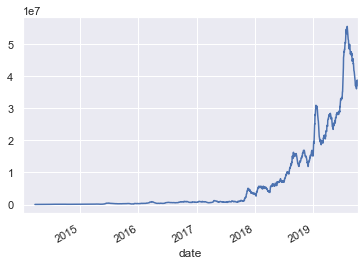

In [180]:
insp_count_30d['likes_count'].plot()

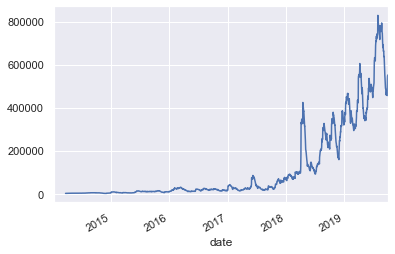

In [182]:
insp_count_30d['comments_count'].plot()

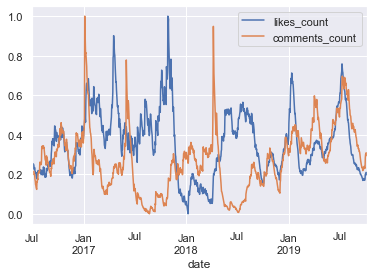

In [184]:
insp_count_30d = (insp_count_30d / insp_count_30d.rolling(window=200).std()).loc[start_date:]
insp_count_10d = (insp_count_10d / insp_count_10d.rolling(window=200).std()).loc[start_date:]

insp_count_30d = min_max_standardise(insp_count_30d)
insp_count_10d = min_max_standardise(insp_count_10d)

insp_count_30d.plot()

In [185]:
insta_features = pd.concat([
    insp_count_30d,
    insp_count_10d
], axis=1)

insta_features.head()

,likes_count,comments_count,likes_count,comments_count
date,,,,
2016-07-01,0.229594,0.220678,0.191177,0.092066
2016-07-02,0.231347,0.217407,0.181904,0.083809
2016-07-03,0.243366,0.215626,0.201298,0.078428
2016-07-04,0.245420,0.210282,0.213967,0.078861
2016-07-05,0.252658,0.211023,0.245564,0.093140


## Targets to predict
Direction of the stock price:

In [219]:
# prices = quandl.get('EOD/{}'.format(ric), paginate=True)
prices = pd.read_pickle('data/{}_prices.pickle'.format(ric))

prices.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2002-05-23,16.19,17.40,16.04,16.75,7485000.0,0.0,1.0,1.156429,1.242857,1.145714,1.196429,104790000.0
2002-05-24,17.00,17.15,16.76,16.94,793200.0,0.0,1.0,1.214286,1.225000,1.197143,1.210000,11104800.0
2002-05-28,16.99,17.25,16.20,16.20,472100.0,0.0,1.0,1.213571,1.232143,1.157143,1.157143,6609400.0
2002-05-29,16.30,16.30,15.20,15.45,482700.0,0.0,1.0,1.164286,1.164286,1.085714,1.103571,6757800.0
2002-05-30,15.51,15.51,15.00,15.00,725300.0,0.0,1.0,1.107857,1.107857,1.071429,1.071429,10154200.0


In [187]:
prices = prices.loc['2012':fb_features.index[-1], 'Adj_Close']

In [188]:
prices = prices.resample('B').interpolate(method='cubic')

In [190]:
direction_4w = prices.shift(-20) - prices
direction_4w[direction_4w >= 0] = 1
direction_4w[direction_4w < 0] = 0

direction_4w.head()

Date
2012-01-03    1.0
2012-01-04    1.0
2012-01-05    1.0
2012-01-06    1.0
2012-01-09    1.0
Freq: B, Name: Adj_Close, dtype: float64

In [191]:
direction_4w = direction_4w['2016-07':].dropna()

direction_4w.index

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14',
               ...
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06'],
              dtype='datetime64[ns]', name='Date', length=831, freq='B')

Combine all features:

In [195]:
features = pd.concat([
    fb_features,
    insta_features
], axis=1).loc[direction_4w.index]

Filter out nan rows:

In [196]:
keep_index = features.loc[features.isna().sum(axis=1) == 0].index
X = features.loc[keep_index]
y = direction_4w[keep_index]

## Training

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(50, 1500, 50)]
max_features = ['sqrt']
max_depth = [int(x) for x in range(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_clf = RandomForestClassifier()

rf_cv_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [199]:
rf_cv_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   57.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [200]:
rf_cv_search.best_params_

{'n_estimators': 350,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = rf_cv_search.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.8666666666666667

In [202]:
confusion_matrix(y_test, y_pred)

array([[60, 15],
       [ 7, 83]])